In [110]:
import pandas as pd
import numpy as np
import re #usful for searching words in pharagraph
from nltk.corpus import stopwords  #words doesn't add much value to phara (rticals)
from nltk.stem.porter import PorterStemmer #gives a root word
from sklearn.feature_extraction.text import TfidfVectorizer #convert text in to feature vectors
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
data=pd.read_csv("fake-news/train.csv")

In [78]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [79]:
data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [80]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saranga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### pre-processing 

In [82]:
data.shape

(20800, 5)

In [83]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [84]:
#replace null values using null string
data=data.fillna("")

In [85]:
#merge author name and news title
data["content"]=data["author"]+" "+data["title"]

In [86]:
data["content"]

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [87]:
#seperate the data and label
X=data.drop(columns="label",axis=1) #axis=1 "removing a column"
y=data["label"]

### stemming
#### the process of reducing a word to it's root word
#####  eg:-  actor, actress, acting -----> act 

In [88]:
port_stem=PorterStemmer()

In [89]:
def stemming(content):
    stemmed_content=re.sub("[^a-zA-z]"," ",content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words("english")]
    stemmed_content= " ".join(stemmed_content)
    return stemmed_content

In [90]:
data["content"]=data["content"].apply(stemming)

In [91]:
print(data["content"])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [92]:
X=data["content"].values
y=data["label"].values

In [93]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [94]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [95]:
#ocnverting data to numerical data
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(X)

In [96]:
print(X)

  (0, 15697)	0.28485063562728646
  (0, 2485)	0.3676519686797209
  (0, 7698)	0.24785219520671603
  (0, 8636)	0.29212514087043684
  (0, 2962)	0.2468450128533713
  (0, 13480)	0.2565896679337957
  (0, 4979)	0.233316966909351
  (0, 268)	0.27010124977708766
  (0, 3795)	0.2705332480845492
  (0, 7012)	0.21874169089359144
  (0, 8915)	0.3635963806326075
  (0, 3603)	0.3598939188262559
  (1, 1895)	0.15521974226349364
  (1, 2224)	0.3827320386859759
  (1, 16812)	0.30071745655510157
  (1, 1498)	0.2939891562094648
  (1, 2816)	0.19094574062359204
  (1, 6823)	0.1904660198296849
  (1, 5510)	0.7143299355715573
  (1, 3571)	0.26373768806048464
  (2, 5396)	0.3866530551182615
  (2, 5975)	0.3474613386728292
  (2, 9625)	0.49351492943649944
  (2, 15622)	0.41544962664721613
  (2, 2946)	0.3179886800654691
  :	:
  (20797, 1288)	0.3353805680413986
  (20797, 13128)	0.24825263521976057
  (20797, 12350)	0.27263457663336677
  (20797, 14976)	0.3115945315488075
  (20797, 12144)	0.24778257724396505
  (20797, 9523)	0.295420

#### splitting and training 

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [98]:
#training model
log_reg=LogisticRegression()

In [99]:
log_reg.fit(X_train,y_train)

LogisticRegression()

### evaluation 

In [100]:
#accuracy on train data
X_train_pred=log_reg.predict(X_train)
acc=accuracy_score(X_train_pred,y_train)

In [101]:
print("train data accuracy : ",acc*100,"%")

train data accuracy :  98.64783653846155 %


In [102]:
#accuracy on test data
X_test_pred=log_reg.predict(X_test)
acc=accuracy_score(X_test_pred,y_test)

In [103]:
print("test data accuracy : ",acc*100,"%")

test data accuracy :  97.90865384615385 %


### making prediction

In [104]:
log_reg.predict(X_test[0])

array([1], dtype=int64)

In [105]:
print(y_test[0]) 

1


In [106]:
cf=confusion_matrix(y_test,X_test_pred,labels=[0,1])
print(cf)

[[2004   73]
 [  14 2069]]


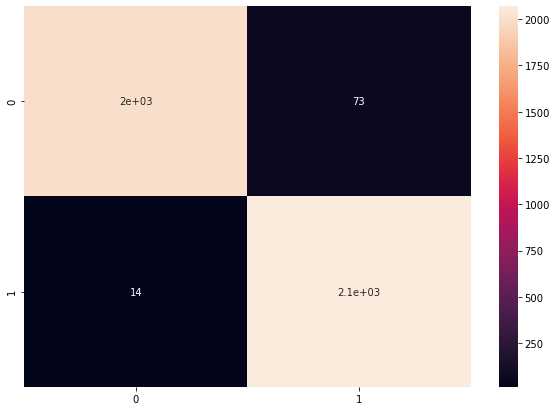

In [114]:
plt.figure(figsize = (10,7))
sns.heatmap(cf, annot=True)